<a href="https://colab.research.google.com/github/devvashisth07/early-event-detection/blob/main/early_event_detection_with_multiple_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

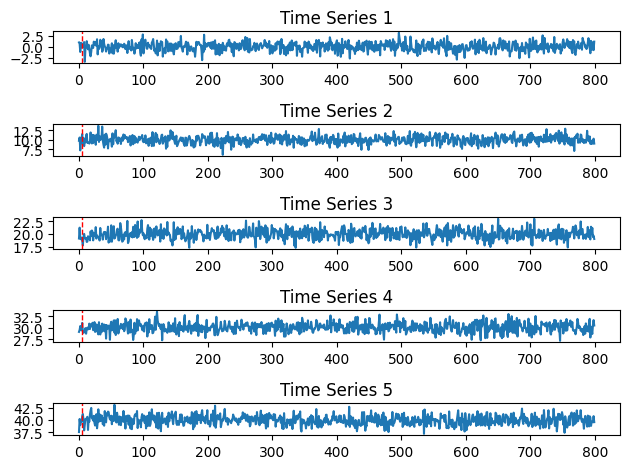

In [9]:
!pip install ruptures
import numpy as np
import matplotlib.pyplot as plt
from ruptures.detection import Pelt

# Generate example data with multiple time series
n_series = 5
n_samples = 200
n_bkps = 3

# Generate synthetic piecewise constant data
data = [np.concatenate([np.random.normal(loc=i * 10, scale=1, size=n_samples) for _ in range(n_bkps + 1)]) for i in range(n_series)]

# Convert the list of arrays to a two-dimensional array
data_matrix = np.vstack(data)

# Choose and fit a model
model = Pelt(model="rbf").fit(data_matrix)

# Detect change points
result = model.predict(pen=10)

# Visualize the results
for i, series in enumerate(data):
    plt.subplot(n_series, 1, i + 1)
    plt.plot(series)
    for bkpt in result:
        plt.axvline(x=bkpt, color='r', linestyle='--', linewidth=1)
    plt.title(f"Time Series {i+1}")

plt.tight_layout()
plt.show()




